In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import re
from datetime import datetime
import warnings
from pandas_profiling import ProfileReport
from scipy.sparse import hstack, vstack

warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\PC\AppData\Local\Temp\ipykernel_5892\2642230010.py:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('data/ProductRaw.csv')

In [3]:
df.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [4]:
df.tail()

,item_id,name,description,rating,price,list_price,brand,group,url,image
4399,14497425,Máy Lạnh LG Inverter 1 HP V10APH,THÔNG TIN CHI TIẾT\nCông suất làm lạnh 1.0HP\n...,3.0,7790000,11090000,LG,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,https://may-lanh-lg-inverter-1-hp-v10aph-p1449...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4400,52294251,Micro Không Dây Alpha Works A1 Chính Hãng,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,0.0,1450000,1890000,OEM,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-khong-day-alpha-works-a1-chinh-h...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4401,29246309,Máy sấy Electrolux 8 Kg EDV805JQSA,THÔNG TIN CHI TIẾT\nBảng điều khiển Điều khiển...,4.4,8790000,11290000,Electrolux,Điện Tử - Điện Lạnh/Máy sấy quần áo,https://may-say-electrolux-8-kg-edv805jqsa-p29...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4402,48574854,"Bộ Chia 2 Pacific Dùng Chia Truyền Hình Cáp, A...",THÔNG TIN CHI TIẾT\nThương hiệu Pacific\nXuất ...,5.0,34000,49000,Pacific,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...,https://bo-chia-2-pacific-dung-chia-truyen-hin...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4403,60228865,Micro Đôi Karaoke - Micro Không Dây MV 01 - Hà...,THÔNG TIN CHI TIẾT\nThương hiệu Shubole\nXuất ...,4.0,360000,500000,Shubole,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-doi-karaoke-micro-khong-day-mv-0...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [5]:
df.shape

(4404, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4404 non-null   int64  
 1   name         4404 non-null   object 
 2   description  4401 non-null   object 
 3   rating       4404 non-null   float64
 4   price        4404 non-null   int64  
 5   list_price   4404 non-null   int64  
 6   brand        4404 non-null   object 
 7   group        4404 non-null   object 
 8   url          4404 non-null   object 
 9   image        4404 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 344.2+ KB


In [7]:
df.describe()

,item_id,rating,price,list_price
count,4.404000e+03,4404.000000,4.404000e+03,4.404000e+03
mean,3.485994e+07,3.678156,2.747125e+06,3.870596e+06
std,2.568152e+07,1.792263,5.528233e+06,7.877977e+06
min,5.466500e+04,0.000000,7.000000e+03,1.200000e+04
25%,1.076859e+07,3.800000,1.500000e+05,2.772500e+05
50%,3.243964e+07,4.500000,4.824440e+05,7.900000e+05
75%,5.630680e+07,4.800000,2.649000e+06,3.507500e+06
max,8.504241e+07,5.000000,6.269000e+07,8.299000e+07


In [8]:
df.isnull().sum()

item_id        0
name           0
description    3
rating         0
price          0
list_price     0
brand          0
group          0
url            0
image          0
dtype: int64

In [9]:
df.duplicated().sum()

31

- There are 4404 rows, but only 3 null rows and 31 duplicated rows => Drop these rows.

In [10]:
df.groupby('item_id')['rating'].count()

item_id
54665       2
55897       2
104180      1
116897      1
122012      1
           ..
83368040    1
83470267    1
84709895    1
84716247    1
85042408    1
Name: rating, Length: 4373, dtype: int64

- Most products were reviewed once

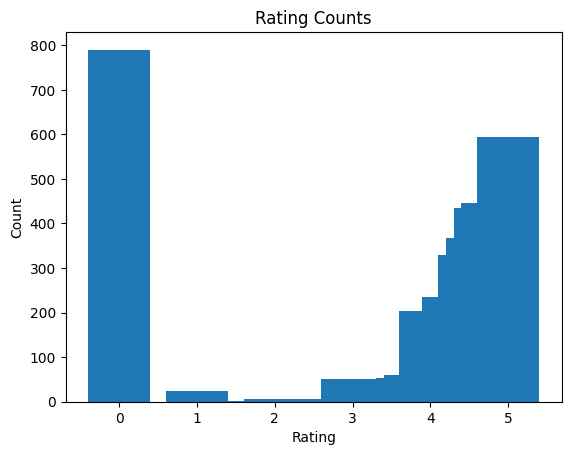

In [11]:
rating_counts = df.groupby('rating')['rating'].count()

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Counts')
plt.show()

- Nearly 800 products remain unrated, with a rating of 0.

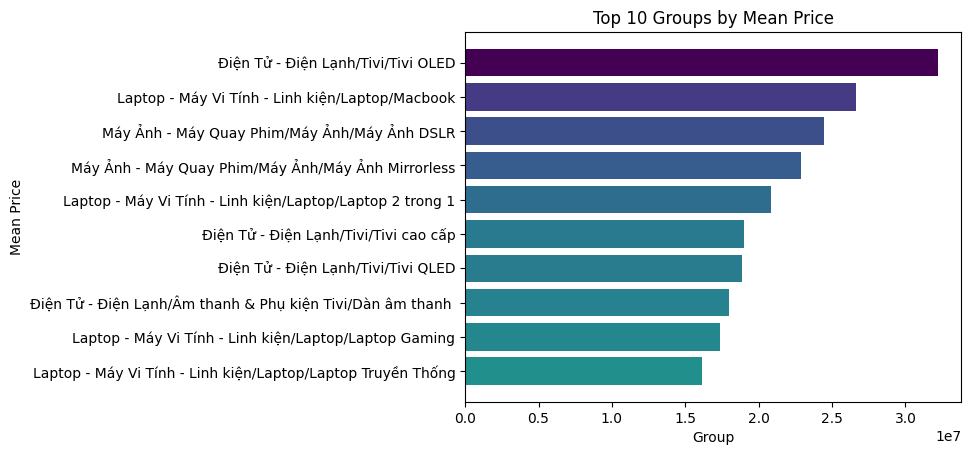

In [12]:
result = df.groupby('group')['price'].mean().sort_values(ascending=False).head(10)
result = result.iloc[::-1]

# Create a color palette for the bars
colors = plt.cm.viridis_r(result.values / max(result.values))

# Create a bar chart
plt.barh(result.index, result.values, color=colors)

plt.xlabel('Group')
plt.ylabel('Mean Price')
plt.title('Top 10 Groups by Mean Price')
plt.show()


The product group with the highest price is Electronics - Refrigeration

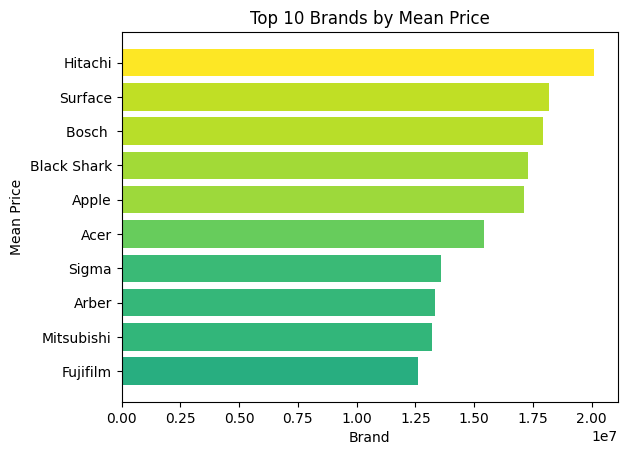

In [13]:
result = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)
result = result.iloc[::-1]

# Create a color palette for the bars
colors = plt.cm.viridis(result.values / max(result.values))

# Create a bar chart
plt.barh(result.index, result.values, color=colors)

plt.xlabel('Brand')
plt.ylabel('Mean Price')
plt.title('Top 10 Brands by Mean Price')
plt.show()


In [14]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- In the Name column there are many repeated words like "hàng", "hãng", "chính" and in Description column there is "sản phẩm" => remove these words.

In [15]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [16]:
df.reset_index(inplace=True, drop=True)

In [17]:
df.shape

(4370, 10)

In [18]:
df.tail()

,item_id,name,description,rating,price,list_price,brand,group,url,image
4365,14497425,Máy Lạnh LG Inverter 1 HP V10APH,THÔNG TIN CHI TIẾT\nCông suất làm lạnh 1.0HP\n...,3.0,7790000,11090000,LG,Điện Tử - Điện Lạnh/Máy lạnh - Máy điều hòa,https://may-lanh-lg-inverter-1-hp-v10aph-p1449...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4366,52294251,Micro Không Dây Alpha Works A1 Chính Hãng,THÔNG TIN CHI TIẾT\nThương hiệu OEM\nXuất xứ t...,0.0,1450000,1890000,OEM,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-khong-day-alpha-works-a1-chinh-h...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4367,29246309,Máy sấy Electrolux 8 Kg EDV805JQSA,THÔNG TIN CHI TIẾT\nBảng điều khiển Điều khiển...,4.4,8790000,11290000,Electrolux,Điện Tử - Điện Lạnh/Máy sấy quần áo,https://may-say-electrolux-8-kg-edv805jqsa-p29...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4368,48574854,"Bộ Chia 2 Pacific Dùng Chia Truyền Hình Cáp, A...",THÔNG TIN CHI TIẾT\nThương hiệu Pacific\nXuất ...,5.0,34000,49000,Pacific,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/P...,https://bo-chia-2-pacific-dung-chia-truyen-hin...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4369,60228865,Micro Đôi Karaoke - Micro Không Dây MV 01 - Hà...,THÔNG TIN CHI TIẾT\nThương hiệu Shubole\nXuất ...,4.0,360000,500000,Shubole,Điện Tử - Điện Lạnh/Âm thanh & Phụ kiện Tivi/M...,https://micro-doi-karaoke-micro-khong-day-mv-0...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [19]:
df.columns

Index(['item_id', 'name', 'description', 'rating', 'price', 'list_price',
       'brand', 'group', 'url', 'image'],
      dtype='object')

In [20]:
# List features
categorical_vars = [i for i in df.dtypes[df.dtypes == 'object'].index]
continuous_vars = [j for j in df.dtypes[df.dtypes != 'object'].index]
print(categorical_vars)
print(continuous_vars)

['name', 'description', 'brand', 'group', 'url', 'image']
['item_id', 'rating', 'price', 'list_price']


In [21]:
# Single variate analysis
def analys_univariate(data, col, types):  
    if types == 'cont':
        print('\nBasic Statistics', col)
        print('-------------------------------------------------')
        print('The number of unique values of', col, 'is', len(data[col].unique()), '\t',
              data[col].unique() if len(data[col].unique()) < 100 else '')
        print("Max = ", data[col].max(), "\tMin = ", data[col].min())
        print("Range = ", data[col].max() - data[col].min())
        print("Mean = ", data[col].mean())
        print("Median = ", np.median(data[col]))
        print("Mode = ", data[col].mode().values)
        print('--------------------------')
        print("Variance = ", round(np.var(data[col]), 3))
        print("Std = ", round(np.std(data[col]), 3))
        print('--------------------------')
        ##########################################
        Q1 = np.quantile(data[col].dropna(), 0.25)
        Q3 = np.quantile(data[col].dropna(), 0.75)
        IQR = Q3 - Q1
        print('Q1 (First quartile):', Q1, '\nQ3 (Third quartile):', Q3)
        print('IQR:', IQR)
        n_O_upper = data[data[col] > (Q3 + 1.5 * IQR)].shape[0]
        n_O_lower = data[data[col] < (Q1 - 1.5 * IQR)].shape[0]
        print('The number of Lower Outliers:', n_O_lower)
        print('The number of Upper Outliers:', n_O_upper)
        print('The percentage of outliers is', round((n_O_lower + n_O_upper) / data.shape[0] * 100, 3), '%')
        print('--------------------------')
        ##########################################
        skew = data[col].skew()
        if skew > 0:
            print('Right-skewed distribution with skewness =', skew)
        elif skew < 0:
            print('Left-skewed distribution with skewness =', skew)
        else:
            print('Skew-normal distribution with skewness =', skew)
        kurt = data[col].kurtosis()
        if kurt > 0:
            print('Leptokurtic distribution with kurtosis =', kurt)
        elif kurt < 0:
            print('Platykurtic distribution with kurtosis =', kurt)
        else:
            print('Mesokurtic distribution (approximately Normal distribution) with kurtosis =', kurt)
        ##########################################
        print('--------------------------')
        print('Visualization with graphs')
        f = plt.figure(figsize=(8, 6), tight_layout=True)
        plt.subplot(211)
        plt.title('Distplot of ' + str(col))
        sns.distplot(data[col])
        plt.subplot(212)
        plt.title('Boxplot of ' + str(col))
        sns.boxplot(x=data[col])
        plt.show()
    elif types == 'cate':  
        print(f'\nBasic statistic of {col} :')
        print('-------------------------------------------------')
        print('There are', len(data[col].unique()), 'categorical variables', col, 'is:\n',
              data[col].unique() if len(data[col].unique()) < 100 else '')
        print('Classification table and proportion of variable types of', col)
        counts = data[col].value_counts()
        percent = data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
        print(pd.DataFrame({'counts': counts, 'percentage': percent}))

In [22]:
for col in categorical_vars:
    analys_univariate(df, col, 'cate')


Basic data of name :
-------------------------------------------------
There are 4327 categorical variables name is:
 
Classification table and proportion of variable types of name
                                                    counts percentage
Máy Nước Nóng Ariston SB35E-VN (3500W)                   3      0.07%
Bộ giá đỡ điện thoại, máy ảnh 3 chân tripod              3      0.07%
Máy sấy Electrolux 8 Kg EDV805JQWA                       3      0.07%
Máy sấy Electrolux 7 Kg EDV705HQWA                       3      0.07%
Tủ lạnh LG Inverter 613 lít GR-B247JDS                   2      0.05%
...                                                    ...        ...
Camera Xiaomi SXJ02ZM Mi Home Security Camera B...       1      0.02%
Phụ Kiện camera Hành Trình Gắn camera Lên Mũ Bả...       1      0.02%
Máy Ảnh Canon EOS 3000D + Lens EF-S 18 - 55mm I...       1      0.02%
Dây đeo  chống mỏi thổ cẩm cho máy ảnh - Q00121          1      0.02%
Micro Đôi Karaoke - Micro Không Dây MV 01 - Hàn.

#### Based on our analysis, we've observed the following:
- There are 521 brands in the dataset, with OEM being the most prevalent, followed by Samsung and Panasonic.
- The largest share of products belongs to the 'Camera - Video Camera/Surveillance Camera/IP Camera' category.


Basic Statistics item_id
-------------------------------------------------
The number of unique values of item_id is 4370 	 
Max =  85042408 	Min =  54665
Range =  84987743
Mean =  35066617.69153318
Median =  32885244.5
Mode =  [   54665    55897   104180 ... 84709895 84716247 85042408]
--------------------------
Variance =  657460577940353.9
Std =  25640994.09
--------------------------
Q1 (First quartile): 10857954.5 
Q3 (Third quartile): 56395549.75
IQR: 45537595.25
The number of Lower Outliers: 0
The number of Upper Outliers: 0
The percentage of outliers is 0.0 %
--------------------------
Right-skewed distribution with skewness = 0.15498630223803475
Platykurtic distribution with kurtosis = -1.4131634632065884
--------------------------
Visualization with graphs


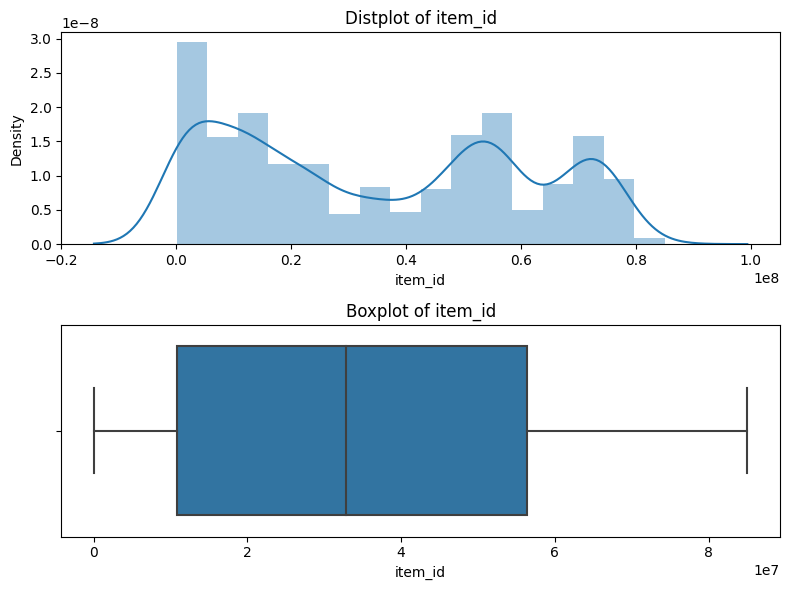


Basic Statistics rating
-------------------------------------------------
The number of unique values of rating is 33 	 [4.  4.5 4.8 4.7 4.6 4.3 4.9 4.2 0.  4.4 3.6 3.7 5.  3.2 2.  4.1 3.3 3.8
 3.9 1.  2.7 3.5 3.  3.4 3.1 2.8 2.5 2.6 1.3 2.3 2.2 2.1 1.8]
Max =  5.0 	Min =  0.0
Range =  5.0
Mean =  3.6734324942791767
Median =  4.5
Mode =  [0.]
--------------------------
Variance =  3.224
Std =  1.796
--------------------------
Q1 (First quartile): 3.8 
Q3 (Third quartile): 4.8
IQR: 1.0
The number of Lower Outliers: 825
The number of Upper Outliers: 0
The percentage of outliers is 18.879 %
--------------------------
Left-skewed distribution with skewness = -1.4285188459775424
Leptokurtic distribution with kurtosis = 0.2805792629954431
--------------------------
Visualization with graphs


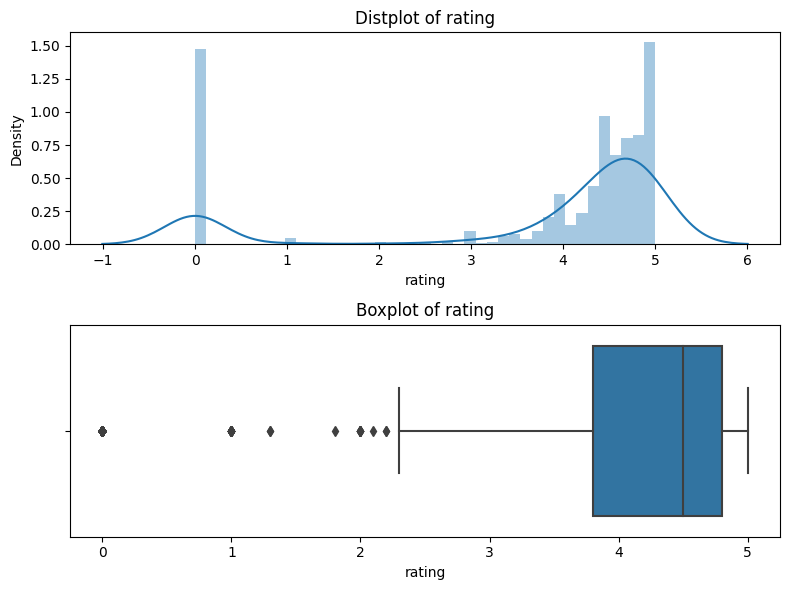


Basic Statistics price
-------------------------------------------------
The number of unique values of price is 1782 	 
Max =  62690000 	Min =  7000
Range =  62683000
Mean =  2764025.271853547
Median =  486500.5
Mode =  [99000]
--------------------------
Variance =  30748647207922.09
Std =  5545146.275
--------------------------
Q1 (First quartile): 150000.0 
Q3 (Third quartile): 2679000.0
IQR: 2529000.0
The number of Lower Outliers: 0
The number of Upper Outliers: 564
The percentage of outliers is 12.906 %
--------------------------
Right-skewed distribution with skewness = 3.6530824214519195
Leptokurtic distribution with kurtosis = 17.642384538762908
--------------------------
Visualization with graphs


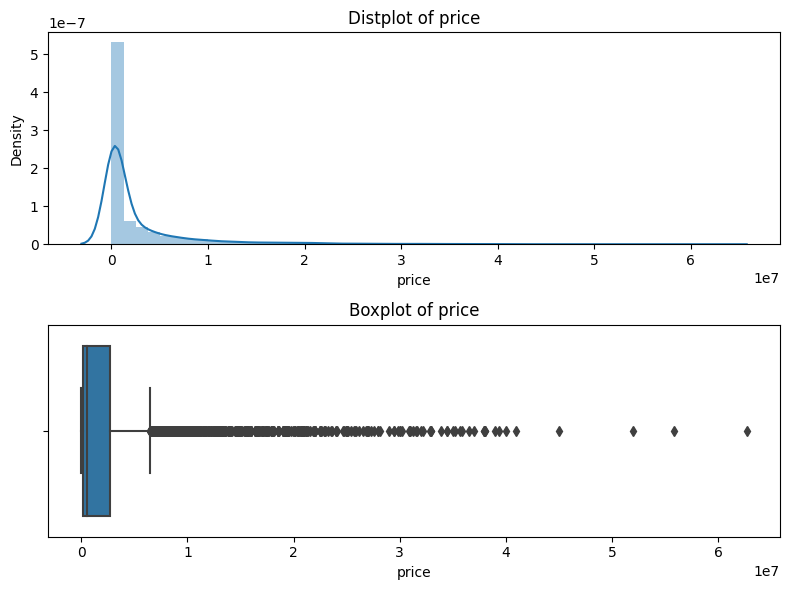


Basic Statistics list_price
-------------------------------------------------
The number of unique values of list_price is 954 	 
Max =  82990000 	Min =  12000
Range =  82978000
Mean =  3894278.070938215
Median =  790000.0
Mode =  [150000]
--------------------------
Variance =  62447559349850.05
Std =  7902376.816
--------------------------
Q1 (First quartile): 279000.0 
Q3 (Third quartile): 3590000.0
IQR: 3311000.0
The number of Lower Outliers: 0
The number of Upper Outliers: 582
The percentage of outliers is 13.318 %
--------------------------
Right-skewed distribution with skewness = 4.030555575498478
Leptokurtic distribution with kurtosis = 21.72450685552961
--------------------------
Visualization with graphs


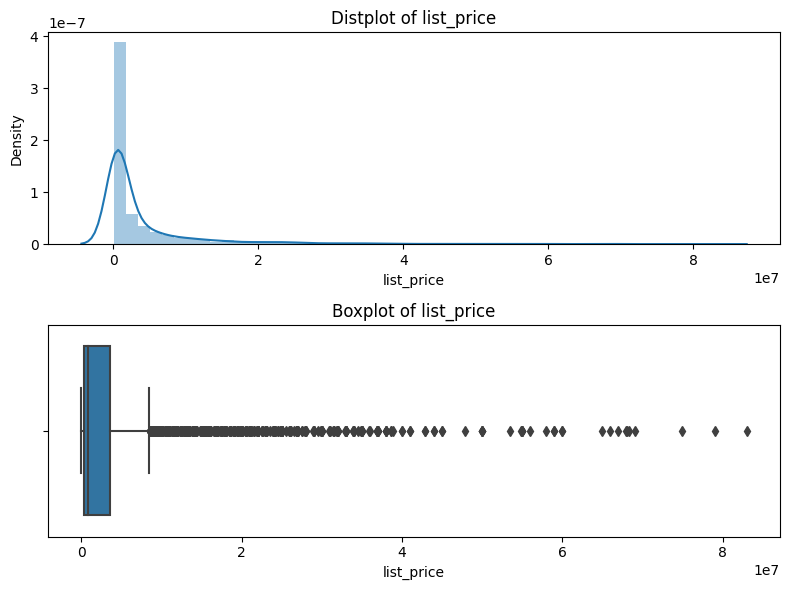

In [23]:
for col in continuous_vars:
    analys_univariate(df, col, 'cont')

- Products are rated in the range of 0 - 5, most products are rated quite high with mean = 3.7.
- Electronic products range in price from 7,000 to 62,690,000.

In [ ]:
STOP_WORD_FILE = 'vietnamese-stopwords.txt'

In [ ]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

In [ ]:
df_new = df[['item_id', 'name', 'description', 'brand', 'group']]

In [ ]:
def join_str(x): return str(x['name'])+ " " + str(x['description'])+ " " + str(x['brand'])+ " " +str(x['group'])
df_new['content'] = df_new.apply(join_str, axis=1)

In [ ]:
# pd.set_option('display.max_colwidth', None)
df_new['content'][0]

'Tai nghe Bluetooth Inpods 12 - Cảm biến vân tay, chống nước,màu sắc đa dạng- 5 màu sắc lựa chọn THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời gian pin - Thời gian nghe nhạc liên tục từ 2.5-4h - Thời gian sạc đầy chỉ khoảng 60p - Thời gian chờ lên tới 140 giờ\nBluetooth 5\nThương hiệu OEM\nXuất xứ thương hiệu Trung Quốc\nĐộ nhạy cảm biến vân tay\nModel i12\nLoại Jack cắm USB Cable\nTrọng lượng 300g\nThời gian sử dụng\n- Thời gian nghe nhạc liên tục từ 2.5-4h\nSKU 4096608751631\nMÔ TẢ SẢN PHẨM\nINPOD 12 là phiên bản nâng cấp mới nhất , tai nghe Bluetooth 5.0 có thiết kế tỉ lệ chuẩn 1:1 với tai Airpod chính hãng\nLược bỏ nút bấm trên thân tai thay vào đó là nút cảm ứng sử dụng dễ dàng và thuận tiện hơn\nThao tác nhận cuộc gọi đến, chuyển nhạc...một cách dễ dàng chỉ bằng 1 chạm\nBluetooth 5.0 mới nhất cho kết nối vô cùng ổn định\n- Bluetooth 5.0 mới nhất cho kết nối vô cùng ổn định\n- 2 tai nghe tự kết nối với nhau khi được lấy ra từ dock sạc\n- Chất âm và thời lượng pin được cải thiện tối

In [ ]:
# Clean text before word_tokenize
def simple_text_clean(dataframe):

    # Remove HTTP links
    dataframe['content'] = dataframe['content'].replace(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '',regex=True)

    # Remove end of line characters
    dataframe['content'] = dataframe['content'].replace(r'[\r\n]+', ' ', regex=True)

    # Remove punctuation
    dataframe['content'] = dataframe['content'].replace('[^\w\s]', ' ', regex=True)
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for char in punctuation:
        dataframe['content'] = dataframe['content'].replace(char, ' ')

    # Remove multiple spaces with one space
    dataframe['content'] = dataframe['content'].replace('[\s]{2,}', ' ', regex=True)

    # Some lines start with a space, remove them
    dataframe['content'] = dataframe['content'].replace('^[\s]{1,}', '', regex=True)

    # Some lines end with a space, remove them
    dataframe['content'] = dataframe['content'].replace('[\s]{1,}$', '', regex=True)

    # Convert to lower case
    dataframe['content'] = dataframe['content'].str.lower()

    # Remove rows that are empty
    dataframe = dataframe[dataframe['content'].str.len() > 0]

    return dataframe

In [ ]:
df_new = simple_text_clean(df_new)

In [ ]:
df_new['content'][0]

'tai nghe bluetooth inpods 12 cảm biến vân tay chống nước màu sắc đa dạng 5 màu sắc lựa chọn thông tin chi tiết dung lượng pin 300 thời gian pin thời gian nghe nhạc liên tục từ 2 5 4h thời gian sạc đầy chỉ khoảng 60p thời gian chờ lên tới 140 giờ bluetooth 5 thương hiệu oem xuất xứ thương hiệu trung quốc độ nhạy cảm biến vân tay model i12 loại jack cắm usb cable trọng lượng 300g thời gian sử dụng thời gian nghe nhạc liên tục từ 2 5 4h sku 4096608751631 mô tả sản phẩm inpod 12 là phiên bản nâng cấp mới nhất tai nghe bluetooth 5 0 có thiết kế tỉ lệ chuẩn 1 1 với tai airpod chính hãng lược bỏ nút bấm trên thân tai thay vào đó là nút cảm ứng sử dụng dễ dàng và thuận tiện hơn thao tác nhận cuộc gọi đến chuyển nhạc một cách dễ dàng chỉ bằng 1 chạm bluetooth 5 0 mới nhất cho kết nối vô cùng ổn định bluetooth 5 0 mới nhất cho kết nối vô cùng ổn định 2 tai nghe tự kết nối với nhau khi được lấy ra từ dock sạc chất âm và thời lượng pin được cải thiện tối ưu dock sạc tiện lợi cho tới 4 lần sạc đầy

In [ ]:
# word_tokenize
df_new["content_wt"]=df_new["content"].apply(lambda x: word_tokenize(x, format="text"))

In [ ]:
df_new['content_wt'][0]

'tai nghe bluetooth inpods 12 cảm_biến vân tay chống nước màu_sắc đa_dạng 5 màu_sắc lựa_chọn thông_tin chi_tiết dung_lượng pin 300 thời_gian pin thời_gian nghe nhạc liên_tục từ 2 5 4 h thời_gian sạc đầy chỉ khoảng 60 p thời_gian chờ lên tới 140 giờ bluetooth 5 thương_hiệu oem xuất_xứ thương_hiệu trung_quốc độ nhạy_cảm biến_vân tay model i12 loại jack cắm usb cable trọng_lượng 300 g thời_gian sử_dụng thời_gian nghe nhạc liên_tục từ 2 5 4 h sku 4096608751631 mô_tả sản_phẩm inpod 12 là phiên_bản nâng_cấp mới nhất tai nghe bluetooth 5 0 có thiết_kế tỉ_lệ chuẩn 1 1 với tai_airpod chính hãng lược bỏ nút bấm trên thân_tai thay vào đó là nút cảm_ứng sử_dụng dễ_dàng và thuận_tiện hơn thao_tác nhận cuộc_gọi đến chuyển_nhạc một_cách dễ_dàng chỉ bằng 1 chạm bluetooth 5 0 mới nhất cho kết_nối vô_cùng ổn_định bluetooth 5 0 mới nhất cho kết_nối vô_cùng ổn_định 2 tai nghe tự kết_nối với nhau khi được lấy ra từ dock sạc chất_âm và thời_lượng pin được cải_thiện tối_ưu_dock sạc tiện_lợi cho tới 4 lần sạc

## Gensim

In [ ]:
# Tokenize(split) the sentences into words
products_gem = [[text for text in x.split()] for x in df_new.content_wt]

In [ ]:
len(products_gem)

4370

In [ ]:
products_gem[0]

['tai',
 'nghe',
 'bluetooth',
 'inpods',
 '12',
 'cảm_biến',
 'vân',
 'tay',
 'chống',
 'nước',
 'màu_sắc',
 'đa_dạng',
 '5',
 'màu_sắc',
 'lựa_chọn',
 'thông_tin',
 'chi_tiết',
 'dung_lượng',
 'pin',
 '300',
 'thời_gian',
 'pin',
 'thời_gian',
 'nghe',
 'nhạc',
 'liên_tục',
 'từ',
 '2',
 '5',
 '4',
 'h',
 'thời_gian',
 'sạc',
 'đầy',
 'chỉ',
 'khoảng',
 '60',
 'p',
 'thời_gian',
 'chờ',
 'lên',
 'tới',
 '140',
 'giờ',
 'bluetooth',
 '5',
 'thương_hiệu',
 'oem',
 'xuất_xứ',
 'thương_hiệu',
 'trung_quốc',
 'độ',
 'nhạy_cảm',
 'biến_vân',
 'tay',
 'model',
 'i12',
 'loại',
 'jack',
 'cắm',
 'usb',
 'cable',
 'trọng_lượng',
 '300',
 'g',
 'thời_gian',
 'sử_dụng',
 'thời_gian',
 'nghe',
 'nhạc',
 'liên_tục',
 'từ',
 '2',
 '5',
 '4',
 'h',
 'sku',
 '4096608751631',
 'mô_tả',
 'sản_phẩm',
 'inpod',
 '12',
 'là',
 'phiên_bản',
 'nâng_cấp',
 'mới',
 'nhất',
 'tai',
 'nghe',
 'bluetooth',
 '5',
 '0',
 'có',
 'thiết_kế',
 'tỉ_lệ',
 'chuẩn',
 '1',
 '1',
 'với',
 'tai_airpod',
 'chính',
 'hãng',


In [ ]:
stop_words_extra = ['hàng', 'sản_phẩm', 'thông_tin', 'chi_tiết', 'p', 'h', 'g', 'v', 'thương_hiệu']
stop_words = stop_words + stop_words_extra

In [ ]:
# Loại bỏ stopwords
def remove_stopwords(products_gem):
    products_gem_re = [t for t in products_gem if not t in stop_words]
    return products_gem_re

In [ ]:
products_gem_re = [remove_stopwords(text) for text in products_gem]

In [ ]:
products_gem_re[0]

['tai',
 'bluetooth',
 'inpods',
 '12',
 'cảm_biến',
 'vân',
 'chống',
 'màu_sắc',
 'đa_dạng',
 '5',
 'màu_sắc',
 'lựa_chọn',
 'dung_lượng',
 'pin',
 '300',
 'pin',
 'nhạc',
 'liên_tục',
 '2',
 '5',
 '4',
 'sạc',
 '60',
 'chờ',
 '140',
 'bluetooth',
 '5',
 'oem',
 'xuất_xứ',
 'trung_quốc',
 'độ',
 'nhạy_cảm',
 'biến_vân',
 'model',
 'i12',
 'jack',
 'cắm',
 'usb',
 'cable',
 'trọng_lượng',
 '300',
 'nhạc',
 'liên_tục',
 '2',
 '5',
 '4',
 'sku',
 '4096608751631',
 'mô_tả',
 'inpod',
 '12',
 'phiên_bản',
 'nâng_cấp',
 'tai',
 'bluetooth',
 '5',
 '0',
 'thiết_kế',
 'tỉ_lệ',
 'chuẩn',
 '1',
 '1',
 'tai_airpod',
 'hãng',
 'lược',
 'nút',
 'bấm',
 'thân_tai',
 'thay',
 'nút',
 'cảm_ứng',
 'dễ_dàng',
 'thuận_tiện',
 'thao_tác',
 'cuộc_gọi',
 'chuyển_nhạc',
 'dễ_dàng',
 '1',
 'chạm',
 'bluetooth',
 '5',
 '0',
 'kết_nối',
 'vô_cùng',
 'ổn_định',
 'bluetooth',
 '5',
 '0',
 'kết_nối',
 'vô_cùng',
 'ổn_định',
 '2',
 'tai',
 'kết_nối',
 'dock',
 'sạc',
 'chất_âm',
 'thời_lượng',
 'pin',
 'cải_thiện

In [ ]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
dictionary = corpora.Dictionary(products_gem_re)

In [ ]:
# List of features in dictionary
dictionary.token2id

{'0': 0,
 '1': 1,
 '12': 2,
 '140': 3,
 '2': 4,
 '300': 5,
 '4': 6,
 '4096608751631': 7,
 '5': 8,
 '60': 9,
 'apple': 10,
 'bao_gồm': 11,
 'biến_vân': 12,
 'bluetooth': 13,
 'bluetooth_tai': 14,
 'bấm': 15,
 'cable': 16,
 'chi_phí': 17,
 'chuyển_nhạc': 18,
 'chuẩn': 19,
 'chạm': 20,
 'chất_âm': 21,
 'chống': 22,
 'chờ': 23,
 'cuộc_gọi': 24,
 'cải_thiện': 25,
 'cảm_biến': 26,
 'cảm_ứng': 27,
 'cắm': 28,
 'cồng_kềnh': 29,
 'dock': 30,
 'dung_lượng': 31,
 'dễ_dàng': 32,
 'giao': 33,
 'giá': 34,
 'hiện_hành': 35,
 'huawei': 36,
 'hãng': 37,
 'i12': 38,
 'inpod': 39,
 'inpods': 40,
 'jack': 41,
 'kết_nối': 42,
 'lenovo': 43,
 'liên_tục': 44,
 'luật': 45,
 'lược': 46,
 'lựa_chọn': 47,
 'model': 48,
 'màu_sắc': 49,
 'mô_tả': 50,
 'nhét': 51,
 'nhạc': 52,
 'nhạy_cảm': 53,
 'nâng_cấp': 54,
 'nút': 55,
 'oem': 56,
 'oppo': 57,
 'phiên_bản': 58,
 'phát_sinh': 59,
 'phí': 60,
 'phương_thức': 61,
 'phụ_kiện': 62,
 'phụ_phí': 63,
 'pin': 64,
 'pin_tai': 65,
 'samsung': 66,
 'sku': 67,
 'sạc': 68,
 '

In [ ]:
# Numbers of features (word) in dictionary
feature_cnt = len(dictionary.token2id)

In [ ]:
feature_cnt

41690

In [ ]:
# Obtain corpus based on dictionary (dense matrix)
corpus = [dictionary.doc2bow(text) for text in products_gem_re]

In [ ]:
corpus[0]

[(0, 3),
 (1, 3),
 (2, 2),
 (3, 2),
 (4, 4),
 (5, 2),
 (6, 4),
 (7, 1),
 (8, 8),
 (9, 2),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 7),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 2),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 2),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 3),
 (43, 1),
 (44, 3),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 2),
 (50, 1),
 (51, 1),
 (52, 3),
 (53, 1),
 (54, 1),
 (55, 2),
 (56, 2),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 2),
 (63, 1),
 (64, 3),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 5),
 (69, 1),
 (70, 5),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 4),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 2),
 (92, 1),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 2)]

In [ ]:
# Use TF-IDF Model to process corpus, obtaining index
tfidf = models.TfidfModel(corpus)
# tính toán sự tương tự trong ma trận thưa thớt
index = similarities.SparseMatrixSimilarity(tfidf[corpus],
                                            num_features = feature_cnt)

### Product recommendation

#### Case 1: User click a product

In [ ]:
def recommender(item_id):
    product_selection = df_new[df_new['item_id'] == item_id]
    name_description_pre = product_selection['content_wt'].to_string(index=False)
    view_product = [text for text in name_description_pre.split()]
    view_product = remove_stopwords(view_product)

    # Convert search words into Sparse Vectors
    kw_vector = dictionary.doc2bow(view_product)

    # similarity calculation
    sim = index[tfidf[kw_vector]]

    result = {'index': [], 'item_id': [], 'name': [], 'similarity': []}

    for i, similarity_score in enumerate(sim):
        if i != df_new[df_new['item_id'] == item_id].index[0]:
            result['index'].append(i)
            result['item_id'].append(df.iloc[i]['item_id'])
            result['name'].append(df.iloc[i]['name'])
            result['similarity'].append(similarity_score)

    result_df = pd.DataFrame(result)
    result_df.sort_values(by=['similarity'], inplace=True, ascending=False)
    return result_df.head(5)


In [ ]:
start_time = datetime.now()
results = recommender(48102821) #Tai nghe Bluetooth Inpods 12
end_time = datetime.now()
results

,index,item_id,name,similarity
74,75,35607267,Tai nghe Bluetooth Inpods 12 Thời trang,0.273287
22,23,35373097,Tai Nghe Bluetooth True Wireless AMOI F9 5.0 C...,0.195638
65,66,52889826,"Tai Nghe Bluetooth Không Dây 5.0, AMOI F9, Cảm...",0.193656
718,719,48273751,Tai nghe Blutooth 5.0 kiêm dock sạc dự phòng- ...,0.193007
76,77,70772235,Tai nghe bluetooth nhét tai không dây tai phon...,0.186504


In [ ]:
print('Time token:', end_time-start_time)

Time token: 0:00:02.806397


In [ ]:
start_time = datetime.now()
results = recommender(14497425) #Máy Lạnh LG Inverter 1 HP V10APH
end_time = datetime.now()
results

,index,item_id,name,similarity
4013,4013,77925958,Máy Lạnh LG Inverter 1.0HP V10ENW1 - Chỉ Giao ...,0.391532
3828,3828,1530039,Máy Lạnh LG Inverter 1 HP V10APF,0.316131
3481,3481,76273939,Máy Lạnh LG Inverter 1.5 HP V13ENS1 - Chỉ giao...,0.312396
4272,4272,1533113,Máy Lạnh LG Inverter 1.5 HP V13APF,0.296938
4264,4264,76273925,Máy Lạnh LG Inverter 2.0 HP V18ENF1 - Chỉ giao...,0.294468


In [ ]:
print('Time token:', end_time-start_time)

Time token: 0:00:03.036591


#### Case 2: User search a product

In [ ]:
def recommender_search(text):
    dataframe = pd.DataFrame([text], columns=['content'])
    dataframe = simple_text_clean(dataframe)
    dataframe["content_wt"]=dataframe["content"].apply(lambda x: word_tokenize(x, format="text"))

    name_description_pre = dataframe['content_wt'].to_string(index=False)
    view_product = [text for text in name_description_pre.split()]
    view_product = remove_stopwords(view_product)

    # Convert search words into Sparse Vectors
    kw_vector = dictionary.doc2bow(view_product)

    # similarity calculation
    sim = index[tfidf[kw_vector]]

    result = {'index': [], 'item_id': [], 'name': [], 'similarity': []}

    for i, similarity_score in enumerate(sim):
      result['index'].append(i)
      result['item_id'].append(df.iloc[i]['item_id'])
      result['name'].append(df.iloc[i]['name'])
      result['similarity'].append(similarity_score)

    result_df = pd.DataFrame(result)
    result_df.sort_values(by=['similarity'], inplace=True, ascending=False)
    return result_df.head(5)

In [ ]:
text = 'Tai nghe Bluetooth Inpods 12'
start_time = datetime.now()
results = recommender_search(text)
end_time = datetime.now()
results

,index,item_id,name,similarity
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,0.317350
75,75,35607267,Tai nghe Bluetooth Inpods 12 Thời trang,0.290978
719,719,48273751,Tai nghe Blutooth 5.0 kiêm dock sạc dự phòng- ...,0.212302
77,77,70772235,Tai nghe bluetooth nhét tai không dây tai phon...,0.205149
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,0.202108


In [ ]:
print('Time token:', end_time-start_time)

Time token: 0:00:00.837165


In [ ]:
text = 'Máy Lạnh LG Inverter 1 HP'
start_time = datetime.now()
results = recommender_search(text)
end_time = datetime.now()
results

,index,item_id,name,similarity
4013,4013,77925958,Máy Lạnh LG Inverter 1.0HP V10ENW1 - Chỉ Giao ...,0.630031
3828,3828,1530039,Máy Lạnh LG Inverter 1 HP V10APF,0.508700
3481,3481,76273939,Máy Lạnh LG Inverter 1.5 HP V13ENS1 - Chỉ giao...,0.502690
4365,4365,14497425,Máy Lạnh LG Inverter 1 HP V10APH,0.482271
4272,4272,1533113,Máy Lạnh LG Inverter 1.5 HP V13APF,0.477817


In [ ]:
print('Time token:', end_time-start_time)

Time token: 0:00:00.829330


The Gensim algorithm runs quickly, and its product recommendations for both clicks and searches are quite suitable.

## Cosine_similarity

In [ ]:
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words=stop_words)

In [ ]:
tfidf_matrix = tf.fit_transform(df_new.content_wt)

In [ ]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_similarities

array([[1.        , 0.45273491, 0.05255982, ..., 0.0167113 , 0.00999887,
        0.05041727],
       [0.45273491, 1.        , 0.04799367, ..., 0.01670942, 0.02885836,
        0.06506348],
       [0.05255982, 0.04799367, 1.        , ..., 0.03230976, 0.03088948,
        0.05207293],
       ...,
       [0.0167113 , 0.01670942, 0.03230976, ..., 1.        , 0.00699685,
        0.03796546],
       [0.00999887, 0.02885836, 0.03088948, ..., 0.00699685, 1.        ,
        0.05050979],
       [0.05041727, 0.06506348, 0.05207293, ..., 0.03796546, 0.05050979,
        1.        ]])

In [ ]:
df_show = pd.DataFrame(cosine_similarities)
df_show.head()

,0,1,2,3,4,5,6,7,8,9,...,4360,4361,4362,4363,4364,4365,4366,4367,4368,4369
0,1.000000,0.452735,0.052560,0.186603,0.231648,0.302969,0.227040,0.176533,0.184319,0.041726,...,0.148315,0.023258,0.023423,0.020644,0.047417,0.007124,0.027360,0.016711,0.009999,0.050417
1,0.452735,1.000000,0.047994,0.186787,0.362407,0.424257,0.336309,0.149588,0.317618,0.056950,...,0.154224,0.015010,0.031810,0.014202,0.043587,0.028495,0.041094,0.016709,0.028858,0.065063
2,0.052560,0.047994,1.000000,0.047049,0.057875,0.030460,0.047068,0.048336,0.029479,0.407965,...,0.073338,0.033418,0.010202,0.028950,0.013004,0.033763,0.045147,0.032310,0.030889,0.052073
3,0.186603,0.186787,0.047049,1.000000,0.082927,0.061938,0.048560,0.111130,0.043362,0.032202,...,0.193668,0.015058,0.116635,0.032127,0.141704,0.019942,0.037352,0.028732,0.024224,0.071786
4,0.231648,0.362407,0.057875,0.082927,1.000000,0.638438,0.250514,0.054995,0.239974,0.060899,...,0.087141,0.027642,0.036518,0.019156,0.066826,0.041242,0.068192,0.018556,0.017602,0.097730


In [ ]:
cosine_similarities.shape

(4370, 4370)

In [ ]:
# Recommend 10 relative products
def find_highest_score(cosine_similarities, nums = 10):
  results = {}

  for idx, row in df.iterrows():
      start = 0 - (nums+1)
      similar_indices = cosine_similarities[idx].argsort()[start:-1]
      similar_items = [(cosine_similarities[idx][i], df['item_id'][i]) for i in similar_indices]
      results[row['item_id']] = similar_items
  return results

In [ ]:
# Some products are related with item_id =
results = find_highest_score(cosine_similarities)
results[48102821] #Tai nghe Bluetooth Inpods 12

[(0.424807206483996, 35373097),
 (0.4269578723573525, 70772235),
 (0.4277396144594066, 50319688),
 (0.43249578547233947, 52889826),
 (0.43408887926307876, 26348659),
 (0.43563713782450797, 72928043),
 (0.4527349133058186, 52333193),
 (0.4543191229887241, 48273751),
 (0.4681811736111402, 22413470),
 (0.47935848176706447, 56365197)]

In [ ]:
len(results)

4370

### Product Recommendation

#### Case 1: User click a product

In [ ]:
def recommender_cosine(item_id):
    dic={'index': [], 'item_id': [], 'name': [], 'similarity': []}
    results = find_highest_score(cosine_similarities,nums=5)
    for i in range(0,len(results[item_id])):
      id = results[item_id][i][1]
      dic['index'].append(df[df['item_id']==id].index[0])
      dic['item_id'].append(id)
      dic['name'].append(df[df['item_id']==id].name.values[0])
      dic['similarity'].append(results[item_id][i][0])

    dic_df = pd.DataFrame(dic)
    dic_df.sort_values(by=['similarity'], inplace=True, ascending=False)
    return dic_df

In [ ]:
start_time = datetime.now()
results = recommender_cosine(48102821) #Tai nghe Bluetooth Inpods 12
end_time = datetime.now()
results

,index,item_id,name,similarity
4,639,56365197,"Tai nghe bluetooth không dây i12 TWS 5.0, thiế...",0.479358
3,147,22413470,Tai Nghe Bluetooth Air.podes Cảm Ứng Công Nghệ...,0.468181
2,719,48273751,Tai nghe Blutooth 5.0 kiêm dock sạc dự phòng- ...,0.454319
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,0.452735
0,635,72928043,Tai Nghe Bluetooth Amoi F9 kèm Củ Sạc 1A và Cá...,0.435637


In [ ]:
print('Time token:', end_time-start_time)

Time token: 0:00:01.940771


In [ ]:
start_time = datetime.now()
results = recommender_cosine(14497425) #Máy Lạnh LG Inverter 1 HP V10APH
end_time = datetime.now()
results

,index,item_id,name,similarity
4,3619,1534583,Máy Lạnh LG Inverter 1.5 HP V13ENS,0.727528
3,3757,1534193,Máy Lạnh LG Inverter 1.5 HP V13API,0.707271
2,3828,1530039,Máy Lạnh LG Inverter 1 HP V10APF,0.680024
1,4272,1533113,Máy Lạnh LG Inverter 1.5 HP V13APF,0.661186
0,3942,1534275,Máy Lạnh LG Inverter 2 HP V18ENF,0.650295


In [ ]:
print('Time token:', end_time-start_time)

Time token: 0:00:01.948058


#### Case 2: User search a product

In [ ]:
def recommender_search_cosine(text):
    dataframe = pd.DataFrame([text], columns=['content'])
    dataframe = simple_text_clean(dataframe)
    dataframe["content_wt"]=dataframe["content"].apply(lambda x: word_tokenize(x, format="text"))

    tfidf_new = tf.transform(dataframe.content_wt)
    tfidf_concat = vstack((tfidf_matrix, tfidf_new))
    cosine_similarities_new = cosine_similarity(tfidf_concat, tfidf_concat)

    # results = find_highest_score(cosine_similarities_new,nums=5)
    results = {}
    idx = cosine_similarities_new.shape[0] - 1
    similar_indices = cosine_similarities_new[idx].argsort()[-6:-1]
    similar_items = [(cosine_similarities_new[idx][i], df['item_id'][i]) for i in similar_indices]
    results['text'] = similar_items

    dic={'index': [], 'item_id': [], 'name': [], 'similarity': []}
    item_id = list(results)[-1]
    for i in range(0,len(results[item_id])):
      id = results[item_id][i][1]
      dic['index'].append(df[df['item_id']==id].index[0])
      dic['item_id'].append(id)
      dic['name'].append(df[df['item_id']==id].name.values[0])
      dic['similarity'].append(results[item_id][i][0])

    dic_df = pd.DataFrame(dic)
    dic_df.sort_values(by=['similarity'], inplace=True, ascending=False)
    return dic_df

In [ ]:
text = 'Tai nghe Bluetooth Inpods 12'
start_time = datetime.now()
results = recommender_search_cosine(text)
end_time = datetime.now()
results

,index,item_id,name,similarity
4,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,0.354152
3,75,35607267,Tai nghe Bluetooth Inpods 12 Thời trang,0.342823
2,77,70772235,Tai nghe bluetooth nhét tai không dây tai phon...,0.296877
1,719,48273751,Tai nghe Blutooth 5.0 kiêm dock sạc dự phòng- ...,0.289758
0,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,0.271098


In [ ]:
print('Time token:', end_time-start_time)

Time token: 0:00:02.217892


In [ ]:
text ='Máy Lạnh LG Inverter 1 HP'
start_time = datetime.now()
results = recommender_search_cosine(text)
end_time = datetime.now()
results

,index,item_id,name,similarity
4,4013,77925958,Máy Lạnh LG Inverter 1.0HP V10ENW1 - Chỉ Giao ...,0.654812
3,3828,1530039,Máy Lạnh LG Inverter 1 HP V10APF,0.507836
2,3481,76273939,Máy Lạnh LG Inverter 1.5 HP V13ENS1 - Chỉ giao...,0.506901
1,4365,14497425,Máy Lạnh LG Inverter 1 HP V10APH,0.491962
0,3876,32105143,"Remote Điều Khiển Máy Lạnh, Máy Điều Hòa LG AK...",0.487168


In [ ]:
print('Time token:', end_time-start_time)

Time token: 0:00:04.194525


- Cosine_similarity algorithm runs fast
- In the case of clicking on the product, Gensim provides more appropriate product suggestions than Cosine_similarity. For product searches, both algorithms offer similar results.

### Conclusion
#### The ProductRaw dataset contains 4,404 products, but after removing 31 duplicates and 3 null products, we are left with 4,370 products.
#### Make product recommendations in 2 ways:
- Gensim provides fast recommendations with good suitability, taking 2-3 seconds for product clicks and less than 1 second for searches.
- Cosine_similarity is also fast but slightly less suitable, taking 2 seconds for product clicks and 2-4 seconds for searches.
#### => Based on these evaluations, we recommend using Gensim.